# Problema

El problema consiste en predecir la probabilidad de atraso de los vuelos que aterrizan o despegan del aeropuerto de Santiago de Chile (SCL). Para eso les entregamos un dataset usando datos públicos y reales donde cada fila corresponde a un vuelo que aterrizó o despegó de SCL. Para cada vuelo se cuenta con la siguiente información:

|Variable|Definción|
|--|--|
|**Fecha-I** | Fecha y hora programada del vuelo|
|**Vlo-I** | Número de vuelo programado.|
|**Ori-I** | Código de ciudad de origen programado.|
|**Des-I** | Código de ciudad de destino programado.|
|**Emp-I** | Código aerolínea de vuelo programado.|
|**Fecha-O** | Fecha y hora de operación del vuelo.|
|**Vlo-O** | Número de vuelo de operación del vuelo.|
|**Ori-O** | Código de ciudad de origen de operación|
|**Des-O** | Código de ciudad de destino de operación.|
|**Emp-O** | Código aerolínea de vuelo operado.|
|**DIA** | Día del mes de operación del vuelo.|
|**MES** | Número de mes de operación del vuelo.|
|**AÑO** | Año de operación del vuelo.|
|**DIANOM** | Día de la semana de operación del vuelo.
|**TIPOVUELO** | Tipo de vuelo, I =Internacional, N =Nacional.
|**OPERA** | Nombre de aerolínea que opera.
|**SIGLAORI** | Nombre ciudad origen.|
|**SIGLADES** | Nombre ciudad destino.|


# 01: DATA DISTRIBUTION

¿Cómo se distribuyen los datos? ¿Qué te llama la atención o cuál es tu conclusión sobre
esto?

### Preámbulo

In [217]:
# Librerías Principales
import pandas as pd
import matplotlib.pyplot as plt

from scipy.stats import ttest_ind, ttest_1samp

# Configuración General
plt.style.use('fivethirtyeight')
plt.rcParams.update({'font.size': 8})

In [2]:
# Importar datos
df = pd.read_csv('../data/dataset_SCL.csv')

/var/folders/q4/hqn7rgnd2776w9b_lc4r0vlr0000gn/T/ipykernel_5493/3157898594.py:1: DtypeWarning: Columns (1,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/dataset_SCL.csv')


In [3]:
df.head()

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,1,1,2017,Domingo,I,American Airlines,Santiago,Miami
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,2,1,2017,Lunes,I,American Airlines,Santiago,Miami
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,3,1,2017,Martes,I,American Airlines,Santiago,Miami
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,4,1,2017,Miercoles,I,American Airlines,Santiago,Miami
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,5,1,2017,Jueves,I,American Airlines,Santiago,Miami


In [4]:
# Transformar variables fecha-hora de string a datetime
df['Fecha-I'] = pd.to_datetime(df['Fecha-I'])
df['Fecha-O'] = pd.to_datetime(df['Fecha-O'])

# Agregar Variable Fecha
df['fecha'] = df['Fecha-I'].dt.date

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68206 entries, 0 to 68205
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Fecha-I    68206 non-null  datetime64[ns]
 1   Vlo-I      68206 non-null  object        
 2   Ori-I      68206 non-null  object        
 3   Des-I      68206 non-null  object        
 4   Emp-I      68206 non-null  object        
 5   Fecha-O    68206 non-null  datetime64[ns]
 6   Vlo-O      68205 non-null  object        
 7   Ori-O      68206 non-null  object        
 8   Des-O      68206 non-null  object        
 9   Emp-O      68206 non-null  object        
 10  DIA        68206 non-null  int64         
 11  MES        68206 non-null  int64         
 12  AÑO        68206 non-null  int64         
 13  DIANOM     68206 non-null  object        
 14  TIPOVUELO  68206 non-null  object        
 15  OPERA      68206 non-null  object        
 16  SIGLAORI   68206 non-null  object       

### Metodología

Para analizar la distribución de los datos, se utiliza

In [5]:
df.head()

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES,fecha
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,1,1,2017,Domingo,I,American Airlines,Santiago,Miami,2017-01-01
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,2,1,2017,Lunes,I,American Airlines,Santiago,Miami,2017-01-02
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,3,1,2017,Martes,I,American Airlines,Santiago,Miami,2017-01-03
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,4,1,2017,Miercoles,I,American Airlines,Santiago,Miami,2017-01-04
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,5,1,2017,Jueves,I,American Airlines,Santiago,Miami,2017-01-05


#### Origen y Destino

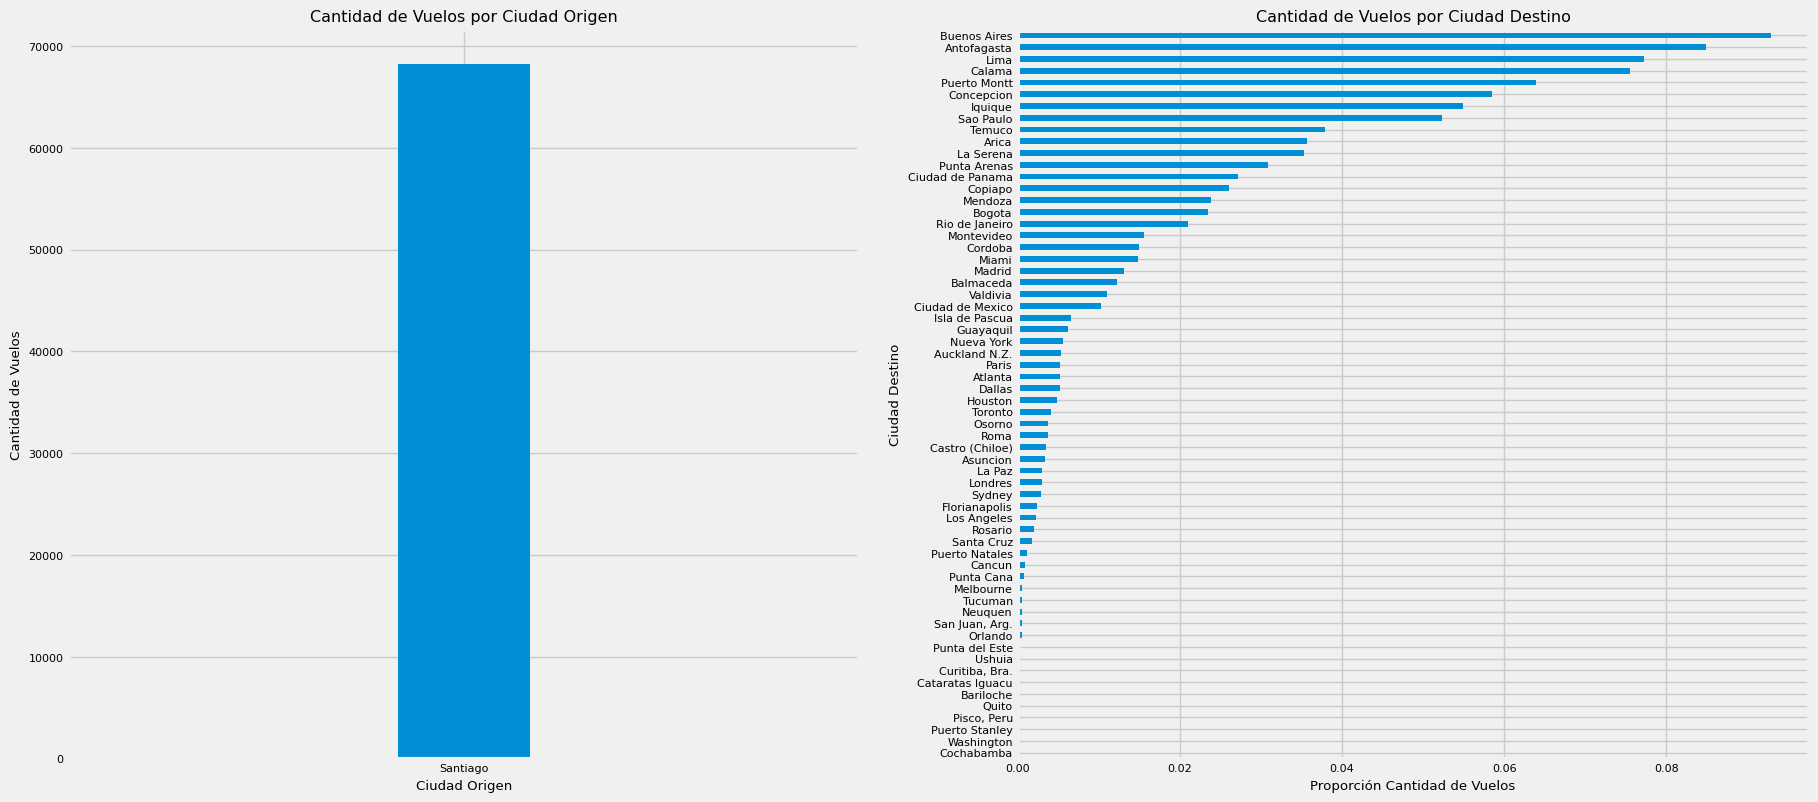

In [466]:
fig, axes = plt.subplots(figsize=(20,9), nrows=1, ncols=2)

# Figura de 
df_ORI = df.groupby('SIGLAORI').count()[['fecha']]
df_ORI.rename(columns={'fecha':'cantidad_vuelos'}, inplace=True)
df_ORI.plot.bar(ax=axes[0], width=.1, legend=False, rot=0)
axes[0].set_title('Cantidad de Vuelos por Ciudad Origen')
axes[0].set_ylabel('Cantidad de Vuelos')
axes[0].set_xlabel('Ciudad Origen')

df_DES = df.SIGLADES.value_counts(1)
df_DES.sort_values(ascending=True).plot.barh(ax=axes[1])
axes[1].set_title('Cantidad de Vuelos por Ciudad Destino')
axes[1].set_xlabel('Proporción Cantidad de Vuelos')
axes[1].set_ylabel('Ciudad Destino')
plt.savefig('results/img/01_DATA_DISTR_VUELOS_SIGLAOR-SIGLADES.png')

plt.show()


In [152]:
df['TIPOVUELO'].value_counts(1)

N    0.541976
I    0.458024
Name: TIPOVUELO, dtype: float64

In [437]:
storage = {}

for fecha in df.fecha.unique():
    
    df_temp = df[df['fecha'] == fecha]
    prop_dest = df_temp.TIPOVUELO.value_counts(1)
    
    storage[fecha] = {'Nacional':prop_dest['N'], 'Internacional':prop_dest['I']}

df_prop_vuelos = pd.DataFrame(storage).T.reset_index().rename(columns={'index':'fecha'})
df_prop_vuelos['MES'] = df_prop_vuelos['fecha'].apply(lambda x: str(x)[:7])

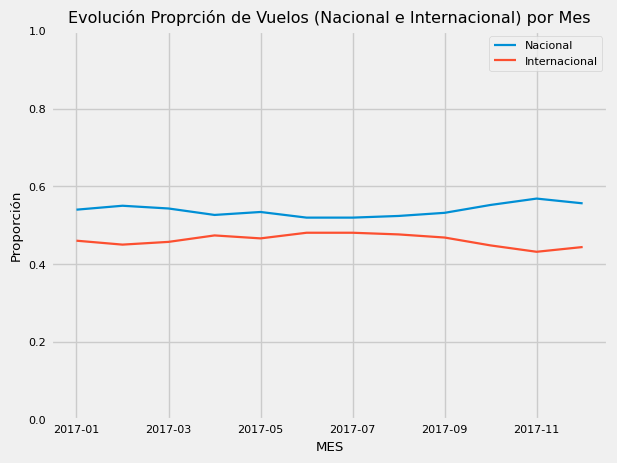

In [467]:
df_prop_vuelos.groupby('MES')[['Nacional', 'Internacional']].mean().plot(linewidth=1.6)
plt.title('Evolución Proprción de Vuelos (Nacional e Internacional) por Mes')
plt.ylabel('Proporción')
plt.ylim(0,1)
plt.savefig('results/img/01_DATA_DISTR_VUELOS_NACIONAL-INTERNACIONAL.png')
plt.show()

In [213]:
stat, pvalue = ttest_ind(df_prop_vuelos['Nacional'], df_prop_vuelos['Internacional'])
print(stat, pvalue)

24.518887733953807 2.9792760644609064e-97


In [239]:
ttest_1samp(df_prop_vuelos['Nacional'], popmean=0.54)

TtestResult(statistic=-0.6221328248924559, pvalue=0.5342440243519957, df=364)

In [241]:
ttest_1samp(df_prop_vuelos['Internacional'], popmean=0.46)

TtestResult(statistic=0.6221328248924061, pvalue=0.5342440243520283, df=364)

#### Operador

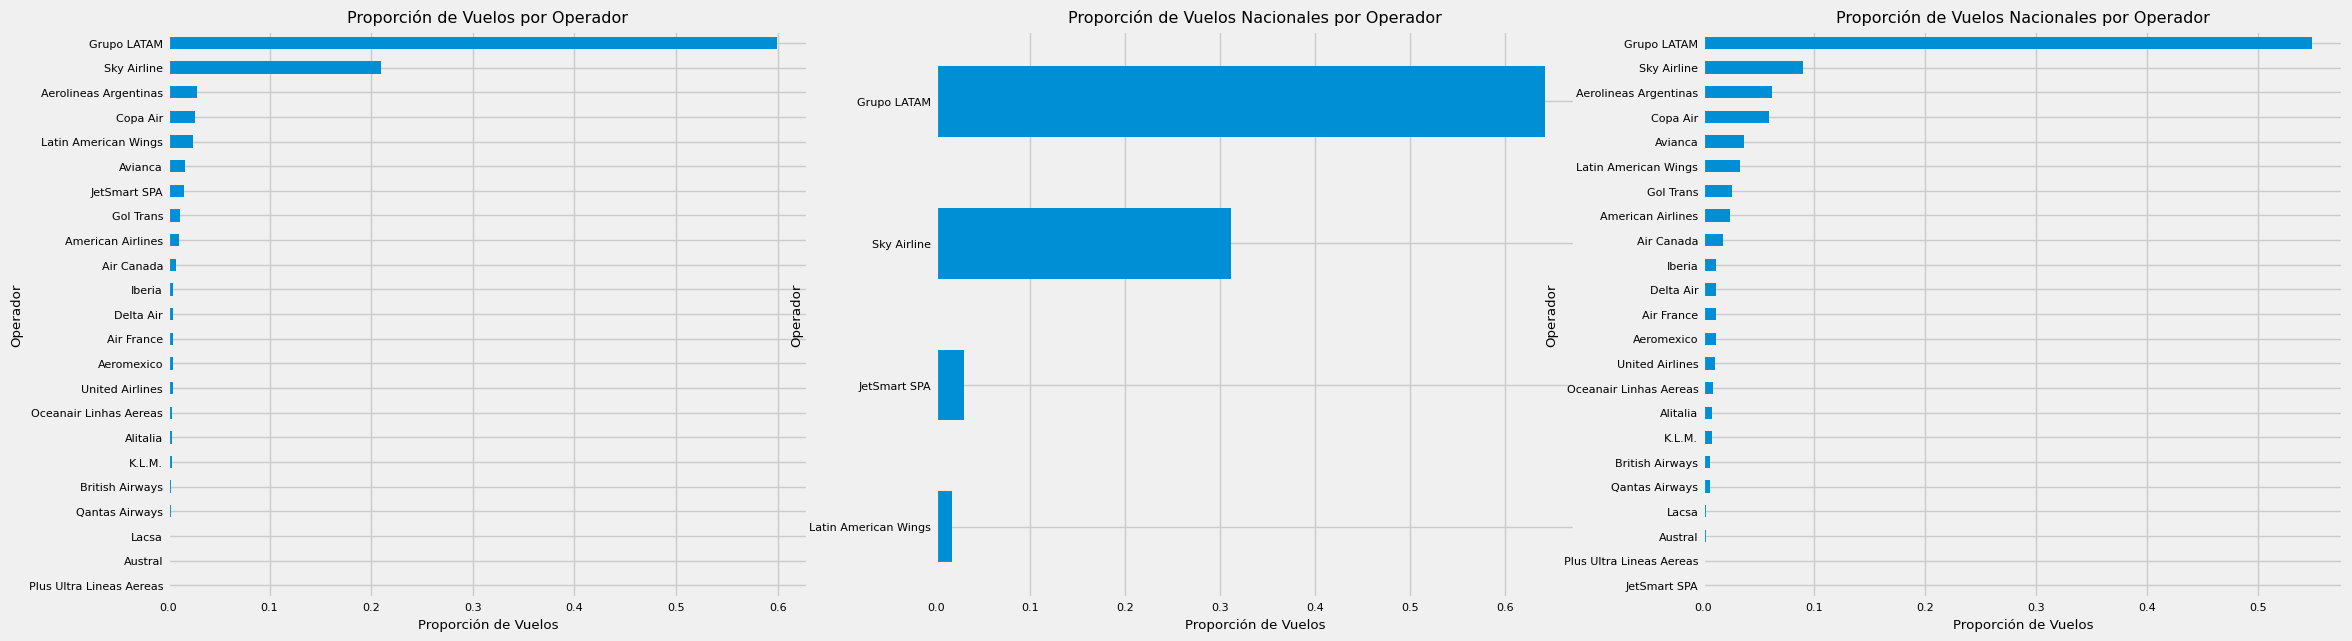

In [468]:
fig, axes = plt.subplots(figsize=(25,7), nrows=1, ncols=3)

df_OPERA = df.OPERA.value_counts(1)
df_OPERA.sort_values(ascending=True).plot.barh(ax=axes[0])
axes[0].set_title('Proporción de Vuelos por Operador')
axes[0].set_ylabel('Operador')
axes[0].set_xlabel('Proporción de Vuelos')

df_OPERA_N = df.query('TIPOVUELO == "N"').OPERA.value_counts(1)
df_OPERA_N.sort_values(ascending=True).plot.barh(ax=axes[1])
axes[1].set_title('Proporción de Vuelos Nacionales por Operador')
axes[1].set_ylabel('Operador')
axes[1].set_xlabel('Proporción de Vuelos')

df_OPERA_I = df.query('TIPOVUELO == "I"').OPERA.value_counts(1)
df_OPERA_I.sort_values(ascending=True).plot.barh(ax=axes[2])
axes[2].set_title('Proporción de Vuelos Nacionales por Operador')
axes[2].set_ylabel('Operador')
axes[2].set_xlabel('Proporción de Vuelos')

plt.savefig('results/img/01_DATA_DISTR_VUELOS_OPERADOR.png')

plt.show()

In [289]:
df_OPERA.head()

Grupo LATAM              0.599537
Sky Airline              0.209630
Aerolineas Argentinas    0.028575
Copa Air                 0.027124
Latin American Wings     0.024543
Name: OPERA, dtype: float64

#### Registros por Fecha

##### Día

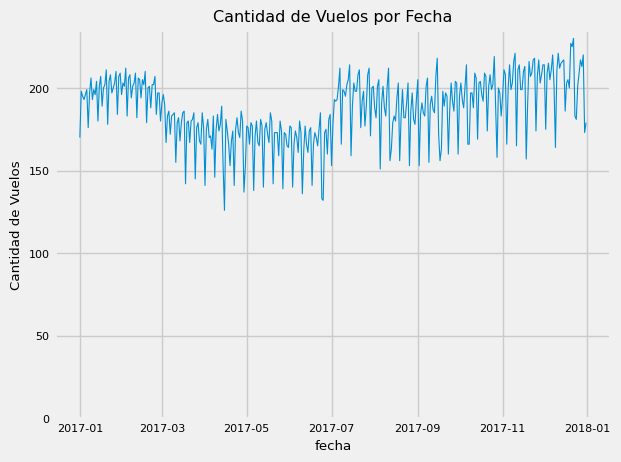

In [469]:
flights_number = df.groupby(['fecha']).count()['Fecha-I'].reset_index()
flights_number.rename(columns={'Fecha-I':'vuelos_programados'}, inplace=True)
flights_number.set_index('fecha', inplace=True)

flights_number.plot(linewidth=.8, legend=False)
plt.title('Cantidad de Vuelos por Fecha')
plt.ylabel('Cantidad de Vuelos')
plt.ylim(0)
plt.savefig('results/img/01_DATA_DISTR_VUELOS_FECHA.png')
plt.show()

##### Mes

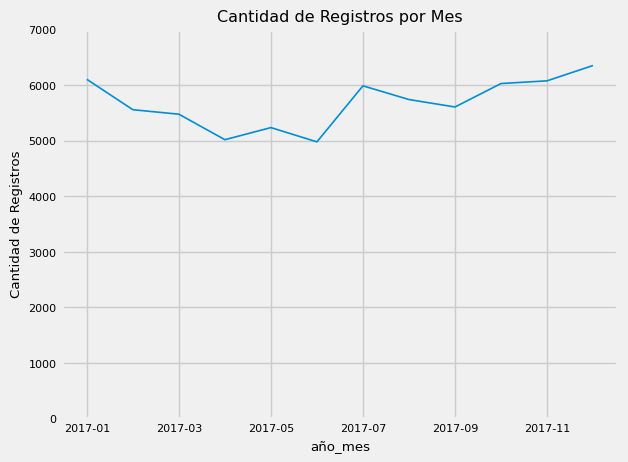

In [470]:
df['año_mes'] = df['fecha'].apply(lambda x: str(x)[:7])
df.groupby('año_mes').count()['Fecha-I'].plot(rot=0, linewidth=1.2)
plt.title('Cantidad de Registros por Mes')
plt.ylabel('Cantidad de Registros')
plt.ylim(0, 7000)
plt.savefig('results/img/01_DATA_DISTR_VUELOS_MES.png')
plt.show()

##### Día de la Semana

In [355]:
df['SEMANA'] = df['Fecha-O'].dt.strftime('%Y%W')
df['DOW'] = df['Fecha-O'].dt.dayofweek

In [409]:
df_DIANOM = df.groupby(['SEMANA','DOW','DIANOM']).count()[['fecha']].sort_index().reset_index()
df_DIANOM.rename(columns={'fecha':'cantidad_vuelos'}, inplace=True)

In [410]:
df_DIANOM = df_DIANOM.groupby('DOW')[['cantidad_vuelos']].agg(['mean', 'std'])

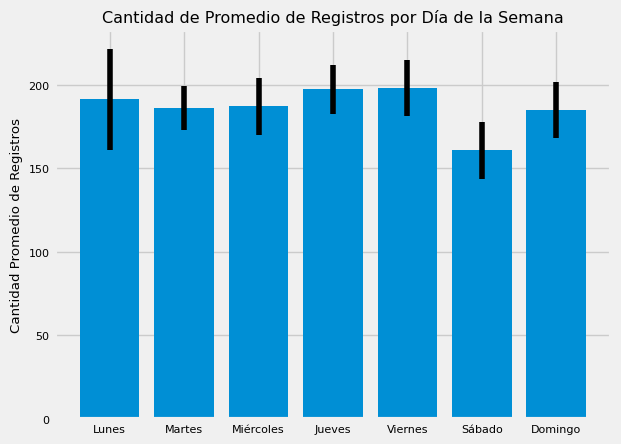

In [471]:
fig, ax = plt.subplots(1,1) 

ax.bar(x=df_DIANOM.index, height=df_DIANOM['cantidad_vuelos']['mean'], yerr=df_DIANOM['cantidad_vuelos']['std'])
ax.set_title('Cantidad de Promedio de Registros por Día de la Semana')
ax.set_ylabel('Cantidad Promedio de Registros')
ax.set_xticks(range(7))
ax.set_xticklabels(['Lunes','Martes','Miércoles','Jueves','Viernes','Sábado','Domingo'])
plt.savefig('results/img/01_DATA_DISTR_VUELOS_DIA-SEMANA.png')
plt.show()